## get the hashes that were unclassified, count how often these are present.
From around 150 metagenomes, more was slow

Set a threshold at 2,5, and 10:
- 1: hash was found at least twice in that metagenome
- 5: hash was found at least 5x
- 20: hash was found at least 10x


Hashes that are found only once: sequencing error


In [35]:
# get number of unassigned vs how many of the unassigned are only there once
import pandas as pd
df = pd.read_csv('../data/251028_agg_by_domain.csv')
df_pivot = df.pivot(index='ident', columns='domain', values='n_unique_weighted_found').reset_index()
df_pivot['total_weighted_hashes'] =vj; df.groupby('ident')['total_weighted_hashes'].first().values
cols = ['ident', 'Eukaryota', 'd__Archaea', 'd__Bacteria', 'plasmids', 'total_weighted_hashes']
df_pivot = df_pivot[cols]
df_pivot['known_hashes'] = df_pivot.drop(columns=['ident', 'total_weighted_hashes']).sum(axis=1)
df =df_pivot


In [36]:
df = df[['ident','total_weighted_hashes', 'known_hashes']]
df

domain,ident,total_weighted_hashes,known_hashes
0,ERR1135178,404363,256538.0
1,ERR1135230,422859,215796.0
2,ERR1135262,370481,176823.0
3,ERR1135274,400820,273285.0
4,ERR1135303,476148,280096.0
...,...,...,...
157,SRR8960923,281535,189300.0
158,SRR8960932,319482,222257.0
159,SRR8960950,297773,186198.0
160,SRR8960959,353204,217163.0


In [37]:
df['all_unknown_hashes'] = df['total_weighted_hashes'] - df['known_hashes']

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_44988/85554437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_unknown_hashes'] = df['total_weighted_hashes'] - df['known_hashes']


In [38]:
# so m10 has -m 10, so hashes with abundance greater than 10. (sum_hashes)
df_filtered_hash = pd.read_csv('../data/sum_hashes_filter.csv')

In [39]:
df =  df.merge(df_filtered_hash, on='ident')

In [42]:
# maybe plot as a % of all unknown hashes.

# cols of importance
cols = ["m10", "m5", "m2"]

# percent is the percent remaining unknown hashes. 
dfp = df[["ident", "total_weighted_hashes", "all_unknown_hashes", "known_hashes"] + cols].copy()
for c in cols:
    dfp[f"{c}_percent"] = df[c] / df["all_unknown_hashes"] * 100


In [43]:
dfp['all_unknown_percent'] = dfp['all_unknown_hashes'] /dfp['total_weighted_hashes'] *100
dfp['known_percent'] = dfp['known_hashes'] /dfp['total_weighted_hashes'] *100

In [54]:
dfp = dfp[['ident','m10_percent', 'm5_percent', 'm2_percent']]

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_44988/647945198.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfm, x="category", y="percent", palette="Set2")


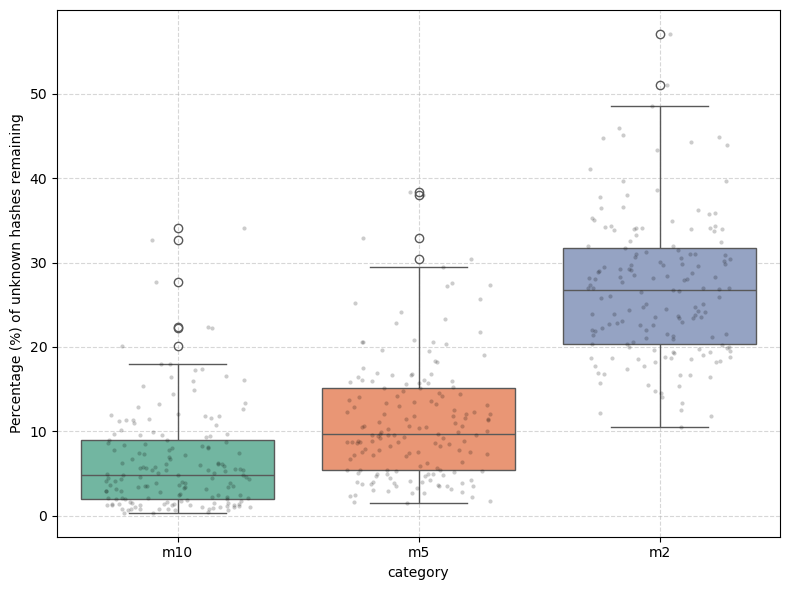

In [56]:
import seaborn as sns
import pandas as pd

# Melt to long format
dfm = dfp.melt(
    value_vars=[c for c in dfp.columns if c.endswith('_percent')],
    var_name="category",
    value_name="percent"
)
dfm["category"] = dfm["category"].str.replace("_percent", "", regex=False)

plt.figure(figsize=(8, 6))
sns.boxplot(data=dfm, x="category", y="percent", palette="Set2")
sns.stripplot(data=dfm, x="category", y="percent", dodge=True, color="black",
    size=3, jitter=0.3, alpha=0.2)
        
plt.ylabel("Percentage (%) of unknown hashes remaining")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
